In [1]:
%load_ext autoreload
from jax import config
config.update("jax_debug_nans", True)
# config.update("jax_disable_jit", True)

import sys
import os
sys.path.append("../../learning_particle_gradients/")
from matplotlib.animation import FuncAnimation

import jax.numpy as np
from jax import grad, jit, vmap, random, lax, jacfwd, value_and_grad
from jax.ops import index_update, index
import matplotlib.pyplot as plt
import matplotlib
import numpy as onp
import jax
import pandas as pd

import utils
import plot
import distributions
import models
import flows
from tqdm import tqdm
key = random.PRNGKey(0)

import kernels
import metrics
# import seaborn as sns
# sns.set_theme()

In [2]:
%autoreload

In [40]:
# set up exporting
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
    'pgf.rcfonts': False,
    'axes.unicode_minus': False, # avoid unicode error on saving plots with negative numbers (??)
})

figure_path = "/home/lauro/documents/msc-thesis/thesis/defense-presentation/figures/"
# save figures by using plt.savefig('path/to/fig')
# remember that latex textwidth is 5.4in
# so use figsize=[5.4, 4], for example
printsize = [5.4, 4]

In [7]:
import stein

# 2dim Funnel

In [6]:
%matplotlib inline

In [28]:
# plots
target = distributions.squiggle_target.target
q = distributions.Gaussian([-1, 0], [1,1])
samples = q.sample(100)

In [29]:
phi = stein.get_phistar(kernels.get_rbf_kernel(1.), target.logpdf, samples)

In [45]:
printsize

[5.4, 4]

In [48]:
printsize = [4, 2]

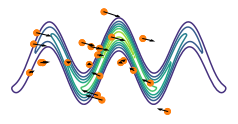

In [57]:
fig, ax = plt.subplots(figsize=printsize)
lim=[-2,2]
ax.set(xlim=lim, ylim=lim)
ax.axis("off")

n = 25
plot.plot_fun_2d(target.pdf,lims=[-2,2], type="contour")
plot.scatter(samples[:n], color="tab:orange")


for x in samples[:n]:
    plt.arrow(*x, *phi(x)/10, length_includes_head=True,
          head_width=0.05, head_length=0.05, color="black", zorder=4)

for item in [fig, ax]:
    item.patch.set_visible(False)
    
plot.scatter(samples[:n], color="tab:orange", zorder=2)


plt.savefig(figure_path + "svgd.pgf", transparent=True)

In [34]:
plt.arrow?

Signature: plt.arrow(x, y, dx, dy, **kwargs)
Docstring:
Add an arrow to the axes.

This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.

Parameters
----------
x, y : float
    The x and y coordinates of the arrow base.

dx, dy : float
    The length of the arrow along x and y direction.

width: float, default: 0.001
    Width of full arrow tail.

length_includes_head: bool, default: False
    True if head is to be counted in calculating the length.

head_width: float or None, default: 3*width
    Total width of the full arrow head.

head_length: float or None, default: 1.5*head_width
    Length of arrow head.

shape: ['full', 'left', 'right'], default: 'full'
    Draw the left-half, right-half, or full arrow.

overhang: float, default: 0
    Fraction that the arrow is swept back (0 overhang means
    triangular shape). Can be negative or greater than one.

head_starts_at_zero: bool, default: False
    If True, the head starts being drawn at coordinate 0
    instead of ending at coo